In [36]:
from nba_api.stats.endpoints import shotchartdetail
import json
import requests
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [54]:

players = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/players.json').text)

In [55]:

def get_player_id(first, last):
    for player in players:
        if player['firstName'] == first and player['lastName'] == last:
            return player['playerId']
    return -1

In [56]:
teams = json.loads(requests.get('https://raw.githubusercontent.com/bttmly/nba/master/data/teams.json').text)

In [57]:

def get_team_id(team_name):
    for team in teams:
        if team['teamName'] == team_name:
            return team['teamId']
    return -1

In [58]:
shot_json = shotchartdetail.ShotChartDetail(
            team_id = get_team_id('Golden State Warriors'),
            player_id = get_player_id('Stephen', 'Curry'),
            context_measure_simple = 'PTS',
            season_nullable = '2015-16',
            season_type_all_star = 'Regular Season')

In [59]:
shot_data = json.loads(shot_json.get_json())


In [60]:
relevant_data = shot_data['resultSets'][0]
headers = relevant_data['headers']
rows = relevant_data['rowSet']

# Create pandas DataFrame
curry_data = pd.DataFrame(rows)
curry_data.columns = headers

In [64]:
curry_data

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021500003,6,201939,Stephen Curry,1610612744,Golden State Warriors,1,10,56,...,Center(C),Less Than 8 ft.,3,12,31,1,1,20151027,GSW,NOP
1,Shot Chart Detail,0021500003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,13,...,Left Side Center(LC),24+ ft.,27,-197,193,1,1,20151027,GSW,NOP
2,Shot Chart Detail,0021500003,36,201939,Stephen Curry,1610612744,Golden State Warriors,1,7,11,...,Center(C),Less Than 8 ft.,0,-4,8,1,1,20151027,GSW,NOP
3,Shot Chart Detail,0021500003,38,201939,Stephen Curry,1610612744,Golden State Warriors,1,6,45,...,Center(C),24+ ft.,25,-11,259,1,1,20151027,GSW,NOP
4,Shot Chart Detail,0021500003,46,201939,Stephen Curry,1610612744,Golden State Warriors,1,5,50,...,Left Side Center(LC),16-24 ft.,22,-117,188,1,1,20151027,GSW,NOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,Shot Chart Detail,0021501227,281,201939,Stephen Curry,1610612744,Golden State Warriors,3,9,34,...,Center(C),24+ ft.,30,1,308,1,1,20160413,GSW,MEM
800,Shot Chart Detail,0021501227,283,201939,Stephen Curry,1610612744,Golden State Warriors,3,9,5,...,Center(C),8-16 ft.,8,-2,82,1,1,20160413,GSW,MEM
801,Shot Chart Detail,0021501227,322,201939,Stephen Curry,1610612744,Golden State Warriors,3,5,43,...,Center(C),Less Than 8 ft.,2,20,16,1,1,20160413,GSW,MEM
802,Shot Chart Detail,0021501227,364,201939,Stephen Curry,1610612744,Golden State Warriors,3,1,27,...,Center(C),Less Than 8 ft.,2,10,21,1,1,20160413,GSW,MEM


In [61]:
def create_court(ax, color):

    # Short corner 3PT lines
    ax.plot([-220, -220], [0, 140], linewidth=2, color=color)
    ax.plot([220, 220], [0, 140], linewidth=2, color=color)

    # 3PT Arc
    ax.add_artist(mpl.patches.Arc((0, 140), 440, 315, theta1=0, theta2=180, facecolor='none', edgecolor=color, lw=2))

    # Lane and Key
    ax.plot([-80, -80], [0, 190], linewidth=2, color=color)
    ax.plot([80, 80], [0, 190], linewidth=2, color=color)
    ax.plot([-60, -60], [0, 190], linewidth=2, color=color)
    ax.plot([60, 60], [0, 190], linewidth=2, color=color)
    ax.plot([-80, 80], [190, 190], linewidth=2, color=color)
    ax.add_artist(mpl.patches.Circle((0, 190), 60, facecolor='none', edgecolor=color, lw=2))

    # Rim
    ax.add_artist(mpl.patches.Circle((0, 60), 15, facecolor='none', edgecolor=color, lw=2))

    # Backboard
    ax.plot([-30, 30], [40, 40], linewidth=2, color=color)

    # Remove ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Set axis limits
    ax.set_xlim(-250, 250)
    ax.set_ylim(0, 470)

    return ax

In [62]:
mpl.rcParams['font.family'] = 'Avenir'
mpl.rcParams['font.size'] = 18
mpl.rcParams['axes.linewidth'] = 2


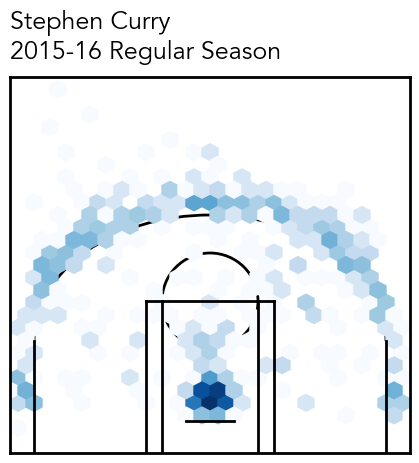

In [63]:
# Create figure and axes
fig = plt.figure(figsize=(4, 3.76))
ax = fig.add_axes([0, 0, 1, 1])

# Draw court
ax = create_court(ax, 'black')

# Plot hexbin of shots
ax.hexbin(curry_data['LOC_X'], curry_data['LOC_Y'] + 60, gridsize=(30, 30), extent=(-300, 300, 0, 940), bins='log', cmap='Blues')

# Annotate player name and season
ax.text(0, 1.05, 'Stephen Curry\n2015-16 Regular Season', transform=ax.transAxes, ha='left', va='baseline')

# Save and show figure
plt.savefig('ShotChart.png', dpi=300, bbox_inches='tight')
plt.show()
